# Python - Control

Importando as bibliotecas necessárias:

In [24]:
import control as ctl 
import matplotlib.pyplot as plt
import numpy as np

### Função de transferencia:

* Passando os termos das expressões :

In [25]:
G1 = ctl.tf([2,5],[1,2,3])
G1

TransferFunction(array([2, 5]), array([1, 2, 3]))

* Passando os polos/zeros e o ganho:

In [26]:
G2 = 5 * ctl.tf(np.poly([-2,-5]),np.poly([-4,-5,-8]))
G2

TransferFunction(array([ 5., 35., 50.]), array([  1.,  17.,  92., 160.]))

Realização Mínima (Cancelamento do Pólo-Zero):

In [27]:
ctl.minreal(G2)

1 states have been removed from the model


TransferFunction(array([ 5., 10.]), array([ 1., 12., 32.]))

Algebra com Função de transferencia:
* Soma:

In [28]:
G3 = G1+G2
G3

TransferFunction(array([  7.,  84., 404., 985., 950.]), array([  1.,  19., 129., 395., 596., 480.]))

* Multiplicação:

In [29]:
G4 =G1*G2
G4

TransferFunction(array([ 10.,  95., 275., 250.]), array([  1.,  19., 129., 395., 596., 480.]))

* Divisão:

In [30]:
G5 = G1/G2
G5

TransferFunction(array([  2.,  39., 269., 780., 800.]), array([  5.,  45., 135., 205., 150.]))

* Feedback:

In [31]:
G6 = ctl.feedback(G1,G2)
G6

TransferFunction(array([  2.,  39., 269., 780., 800.]), array([  1.,  19., 139., 490., 871., 730.]))

### Propriedades

* Ganho:

In [32]:
ctl.dcgain(G6)

1.095890410958904

* Polos:

In [33]:
ctl.pole(G6)

array([-5.50955381+1.07994347j, -5.50955381-1.07994347j,
       -5.        +0.j        , -1.49044619+1.55252541j,
       -1.49044619-1.55252541j])

* Zeros:

In [34]:
ctl.zero(G6)

array([-8. , -5. , -4. , -2.5])

* Relação de paramentro de entrada

In [35]:
ctl.evalfr(G6,3.5+2.5j)

(0.3727721260958405-0.1910571886327011j)

### Convertendo Função de Transferencia (TF) - Espaço de Estados(SS)

* TF &rarr; SS

In [36]:
G1

TransferFunction(array([2, 5]), array([1, 2, 3]))

In [57]:
G1_ss = ctl.tf2ss(G1)
G1_ss

StateSpace(array([[-2., -3.],
       [ 1.,  0.]]), array([[1.],
       [0.]]), array([[2., 5.]]), array([[0.]]))

* SS &rarr; TF

In [38]:
G1_tf = ctl.ss2tf(G1_ss)
G1_tf

TransferFunction(array([2., 5.]), array([1., 2., 3.]))

### Espaço de Estados

* Modelo:

In [39]:
A = [[0,1,0],[0,0,1],[-1,-2,-3]]
B = [[0],[0],[1]]
C = [1,0,0]
D = 0
Sys_ss = ctl.ss(A,B,C,D)
Sys_ss

StateSpace(array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [-1., -2., -3.]]), array([[0.],
       [0.],
       [1.]]), array([[1., 0., 0.]]), array([[0.]]))

In [40]:
Sys_tf = ctl.ss2tf(Sys_ss)
Sys_tf

TransferFunction(array([8.8817842e-16, 8.8817842e-16, 1.0000000e+00]), array([1., 3., 2., 1.]))

* __Nota__: O erro é truncado com o valor da função de transferencia.

### Resposta Impulso

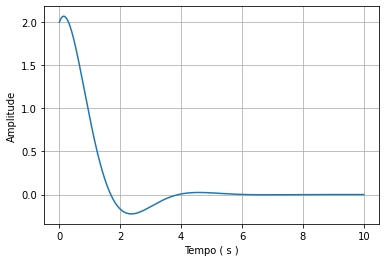

In [41]:
t = np.linspace(0,10,1000)
t1,y1 =ctl.impulse_response(G1,t)

plt.plot(t1,y1)
plt.xlabel("Tempo ( s )")
plt.ylabel("Amplitude")
plt.grid()

### Resposta Degrau


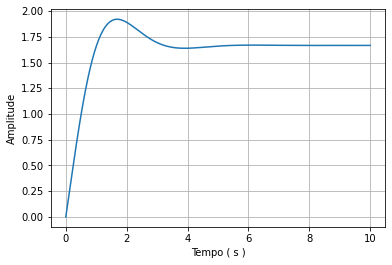

In [42]:
t1 , y1 = ctl.step_response(G1,t)

plt.plot(t1,y1)
plt.xlabel("Tempo ( s )")
plt.ylabel("Amplitude")
plt.grid()

### Resposta Degrau com condição inicial

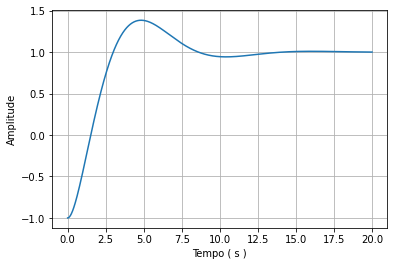

In [43]:
t = np.linspace(0,20,1000)
t1 , y1 = ctl.step_response(Sys_ss,t, [-1,0,2])

plt.plot(t1,y1)
plt.xlabel("Tempo ( s )")
plt.ylabel("Amplitude")
plt.grid()

### Resposta com um input abritario 

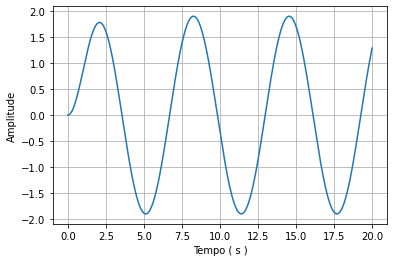

In [44]:
u = np.sin(t)
t1 , y1  = ctl.forced_response(G1,t,u)

plt.plot(t1,y1)
plt.xlabel("Tempo ( s )")
plt.ylabel("Amplitude")
plt.grid()

### Bode plot

(array([1.09696697, 1.09698193, 1.09699708, 1.09701245, 1.09702804,
        1.09704383, 1.09705985, 1.09707609, 1.09709255, 1.09710924,
        1.09712616, 1.09714332, 1.09716071, 1.09717835, 1.09719623,
        1.09721435, 1.09723273, 1.09725136, 1.09727025, 1.0972894 ,
        1.09730881, 1.0973285 , 1.09734845, 1.09736868, 1.09738919,
        1.09740999, 1.09743107, 1.09745244, 1.09747411, 1.09749608,
        1.09751835, 1.09754093, 1.09756382, 1.09758703, 1.09761056,
        1.09763441, 1.09765859, 1.09768311, 1.09770796, 1.09773316,
        1.0977587 , 1.0977846 , 1.09781086, 1.09783747, 1.09786446,
        1.09789181, 1.09791954, 1.09794766, 1.09797616, 1.09800506,
        1.09803435, 1.09806405, 1.09809416, 1.09812468, 1.09815562,
        1.09818699, 1.09821879, 1.09825103, 1.09828371, 1.09831684,
        1.09835042, 1.09838447, 1.09841899, 1.09845398, 1.09848945,
        1.09852541, 1.09856187, 1.09859882, 1.09863629, 1.09867427,
        1.09871276, 1.09875179, 1.09879136, 1.09

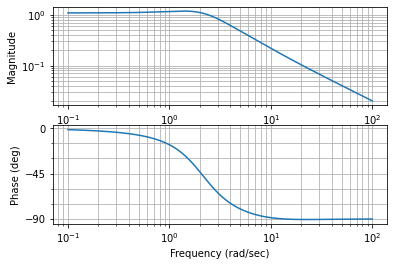

In [45]:
ctl.bode_plot(G6)

### Bode na escala Decibels

(array([1.09696697, 1.09698193, 1.09699708, 1.09701245, 1.09702804,
        1.09704383, 1.09705985, 1.09707609, 1.09709255, 1.09710924,
        1.09712616, 1.09714332, 1.09716071, 1.09717835, 1.09719623,
        1.09721435, 1.09723273, 1.09725136, 1.09727025, 1.0972894 ,
        1.09730881, 1.0973285 , 1.09734845, 1.09736868, 1.09738919,
        1.09740999, 1.09743107, 1.09745244, 1.09747411, 1.09749608,
        1.09751835, 1.09754093, 1.09756382, 1.09758703, 1.09761056,
        1.09763441, 1.09765859, 1.09768311, 1.09770796, 1.09773316,
        1.0977587 , 1.0977846 , 1.09781086, 1.09783747, 1.09786446,
        1.09789181, 1.09791954, 1.09794766, 1.09797616, 1.09800506,
        1.09803435, 1.09806405, 1.09809416, 1.09812468, 1.09815562,
        1.09818699, 1.09821879, 1.09825103, 1.09828371, 1.09831684,
        1.09835042, 1.09838447, 1.09841899, 1.09845398, 1.09848945,
        1.09852541, 1.09856187, 1.09859882, 1.09863629, 1.09867427,
        1.09871276, 1.09875179, 1.09879136, 1.09

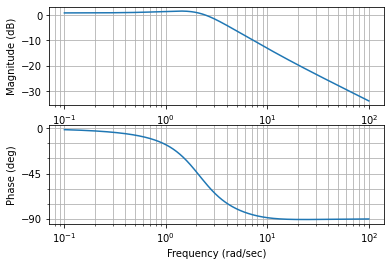

In [46]:
ctl.bode_plot(G6, dB = True)

### Extraindo dados do Bode:

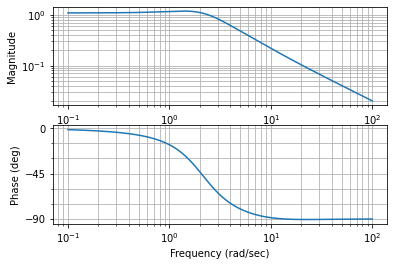

In [47]:
mag, phase , freq = ctl.bode_plot(G6)

In [48]:
mag

array([1.09696697, 1.09698193, 1.09699708, 1.09701245, 1.09702804,
       1.09704383, 1.09705985, 1.09707609, 1.09709255, 1.09710924,
       1.09712616, 1.09714332, 1.09716071, 1.09717835, 1.09719623,
       1.09721435, 1.09723273, 1.09725136, 1.09727025, 1.0972894 ,
       1.09730881, 1.0973285 , 1.09734845, 1.09736868, 1.09738919,
       1.09740999, 1.09743107, 1.09745244, 1.09747411, 1.09749608,
       1.09751835, 1.09754093, 1.09756382, 1.09758703, 1.09761056,
       1.09763441, 1.09765859, 1.09768311, 1.09770796, 1.09773316,
       1.0977587 , 1.0977846 , 1.09781086, 1.09783747, 1.09786446,
       1.09789181, 1.09791954, 1.09794766, 1.09797616, 1.09800506,
       1.09803435, 1.09806405, 1.09809416, 1.09812468, 1.09815562,
       1.09818699, 1.09821879, 1.09825103, 1.09828371, 1.09831684,
       1.09835042, 1.09838447, 1.09841899, 1.09845398, 1.09848945,
       1.09852541, 1.09856187, 1.09859882, 1.09863629, 1.09867427,
       1.09871276, 1.09875179, 1.09879136, 1.09883146, 1.09887

In [49]:
phase

array([-0.02188913, -0.02204205, -0.02219605, -0.02235114, -0.02250733,
       -0.02266463, -0.02282304, -0.02298257, -0.02314324, -0.02330505,
       -0.023468  , -0.02363211, -0.02379739, -0.02396384, -0.02413148,
       -0.0243003 , -0.02447033, -0.02464156, -0.02481402, -0.0249877 ,
       -0.02516262, -0.02533878, -0.0255162 , -0.02569488, -0.02587484,
       -0.02605608, -0.02623862, -0.02642246, -0.02660761, -0.02679408,
       -0.02698188, -0.02717103, -0.02736153, -0.0275534 , -0.02774663,
       -0.02794126, -0.02813727, -0.02833469, -0.02853353, -0.02873379,
       -0.02893549, -0.02913864, -0.02934324, -0.02954932, -0.02975688,
       -0.02996593, -0.03017649, -0.03038856, -0.03060216, -0.0308173 ,
       -0.03103399, -0.03125224, -0.03147207, -0.03169349, -0.03191651,
       -0.03214114, -0.03236739, -0.03259528, -0.03282482, -0.03305603,
       -0.03328891, -0.03352348, -0.03375976, -0.03399775, -0.03423747,
       -0.03447893, -0.03472215, -0.03496714, -0.03521391, -0.03

In [50]:
freq

array([  0.1       ,   0.10069386,   0.10139254,   0.10209607,
         0.10280447,   0.1035178 ,   0.10423607,   0.10495932,
         0.1056876 ,   0.10642092,   0.10715934,   0.10790288,
         0.10865158,   0.10940547,   0.11016459,   0.11092899,
         0.11169868,   0.11247372,   0.11325413,   0.11403996,
         0.11483124,   0.11562801,   0.11643031,   0.11723818,
         0.11805165,   0.11887077,   0.11969557,   0.12052609,
         0.12136238,   0.12220447,   0.1230524 ,   0.12390622,
         0.12476596,   0.12563166,   0.12650337,   0.12738113,
         0.12826498,   0.12915497,   0.13005113,   0.1309535 ,
         0.13186214,   0.13277708,   0.13369837,   0.13462606,
         0.13556018,   0.13650078,   0.13744791,   0.13840161,
         0.13936193,   0.14032891,   0.1413026 ,   0.14228305,
         0.1432703 ,   0.1442644 ,   0.14526539,   0.14627334,
         0.14728827,   0.14831025,   0.14933932,   0.15037553,
         0.15141893,   0.15246957,   0.1535275 ,   0.15

### Nyquist Plot

In [51]:
G = ctl.tf([10],[1,2,3])
G

TransferFunction(array([10]), array([1, 2, 3]))

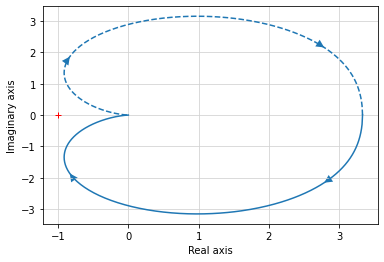

In [52]:
ctl.nyquist_plot(G);

### Margem de Estabilidade

In [53]:
G8 = ctl.tf([10],[1,6,11,6])
G8

TransferFunction(array([10]), array([ 1,  6, 11,  6]))

In [54]:
Gm , Pm, _,Pcf, Gcf,_ = ctl.stability_margins(G8)
print(f"Pcf = {Pcf}, Gm (abs)= {Gm}, Gcf = {Gcf}, Pm = {Pm}")

Pcf = 3.3166247903554, Gm (abs)= 6.0, Gcf = 1.0, Pm = 90.0


### Root Locus

(array([[-3.00000000e+00 +0.j        , -2.00000000e+00 +0.j        ,
         -1.00000000e+00 +0.j        ],
        [-3.04502589e+00 +0.j        , -1.90285828e+00 +0.j        ,
         -1.05211584e+00 +0.j        ],
        [-3.08506358e+00 +0.j        , -1.79948836e+00 +0.j        ,
         -1.11544807e+00 +0.j        ],
        [-3.12135386e+00 +0.j        , -1.67791089e+00 +0.j        ,
         -1.20073525e+00 +0.j        ],
        [-3.15470054e+00 +0.j        , -1.42264978e+00 +0.j        ,
         -1.42264968e+00 +0.j        ],
        [-3.17433401e+00 +0.j        , -1.41283300e+00 +0.18518982j,
         -1.41283300e+00 -0.18518982j],
        [-3.19313782e+00 +0.j        , -1.40343109e+00 +0.26016032j,
         -1.40343109e+00 -0.26016032j],
        [-3.21119796e+00 +0.j        , -1.39440102e+00 +0.31662339j,
         -1.39440102e+00 -0.31662339j],
        [-3.22858676e+00 +0.j        , -1.38570662e+00 +0.36341308j,
         -1.38570662e+00 -0.36341308j],
        [-3.2925380

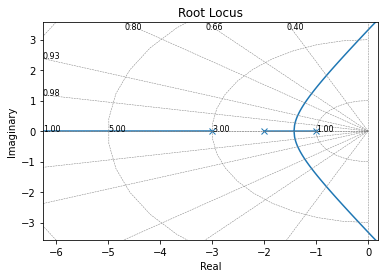

In [55]:
ctl.root_locus(G8)



> Função de Transferência em Malha Aberta:
 
  5
-----
s + 5

....

> Função de Transferência do Controlador:
 
1
-
1

....

> Função de Transferência em Malha fechada:
 
  5
------
s + 10

....


> Função de Transferência em Malha Aberta:
 
  5
-----
s + 5

....

> Função de Transferência do Controlador:
 
4
-
1

....

> Função de Transferência em Malha fechada:
 
  20
------
s + 25

....


> Função de Transferência em Malha Aberta:
 
  5
-----
s + 5

....

> Função de Transferência do Controlador:
 
8
-
1

....

> Função de Transferência em Malha fechada:
 
  40
------
s + 45

....


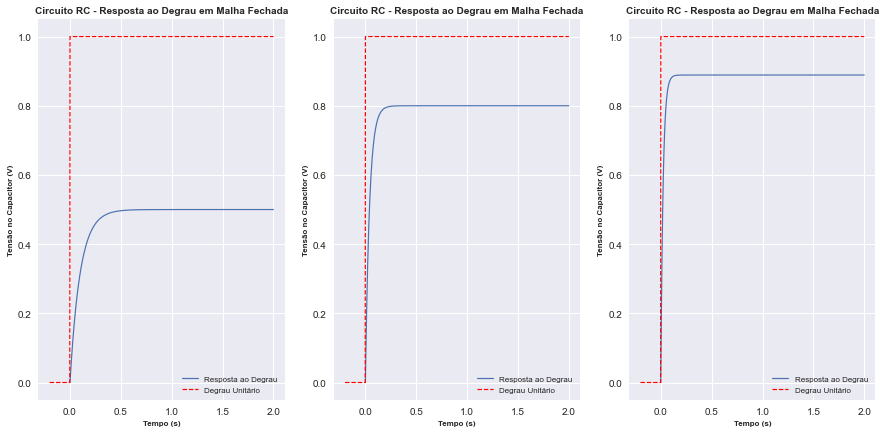

In [56]:
plt.style.use("seaborn")
# Use no Jupyter notebook, colab
%matplotlib inline
# Variáveis da Simulação
R = 20.0e3
C = 10.0e-6
tau = R*C
Temp_simu = 2.0
# Função que calcula a resposta ao degrau
def Simulacao_RC(K_p = 3.0):
  # Cria a Função de Transferência em Malha Aberta
  numerador = [1/tau]
  denominador = [1.0, 1/tau]
  H_s = ctl.tf(numerador, denominador)
  print(f"\n\n> Função de Transferência em Malha Aberta:\n {H_s}")
  print("....")
  # Cria a Função de Transferência do Controlador
  C_s=ctl.tf([K_p],[1.])
  print(f"\n> Função de Transferência do Controlador:\n {C_s}")
  print("....")
  # Cria a Função de Transferência do Sensor
  P_s=ctl.tf([1.],[1.])
  # Função de Transferência em Malha Fechada
  G_s=ctl.series(C_s, H_s);
  G1_s=ctl.feedback(G_s, P_s, sign=-1);
  print(f"\n> Função de Transferência em Malha fechada:\n {G1_s}")
  print("....")
  # Calcula a resposta ao Degrau Unitário
  T_mf, yout_mf = ctl.step_response(G1_s, Temp_simu)
  # Plotando o degrau unitário
  Temp_deg = np.linspace(-0.2, Temp_simu, 1000)
  degrau = np.ones_like(Temp_deg)
  degrau[Temp_deg < 0] = 0
  return T_mf, yout_mf, Temp_deg, degrau, K_p
# Função que plota 3 gráficos com K_p diferentes para a resposta ao degrau
def prot_grafico(T_mf, yout_mf, Temp_deg, degrau, K_p, x):
  plt.subplot(1, 3, x)
  plt.plot(T_mf, yout_mf, linewidth = 1.2)
  plt.plot(Temp_deg, degrau, color = "r", linestyle = "--",
           linewidth = 1.2)
  
  # Customizando a figura com Titulo,  Títulos nos eixos, Legenda e    Grid
  plt.title("Circuito RC - Resposta ao Degrau em Malha Fechada",
            fontweight="bold", fontsize =  10)
  plt.ylabel("Tensão no Capacitor (V)", fontweight="bold",
             fontsize = 8)
  plt.xlabel("Tempo (s)", fontweight="bold", fontsize = 8)
  plt.legend(["Resposta ao Degrau", "Degrau Unitário"],
             fontsize = 8)
if __name__ == "__main__":
    
  # Plotando a resposta ao Degrau usando o metodo plt.plot() da   biblioteca matplotlib
  plt.figure(figsize=(15, 7))
  T_mf, yout_mf, Temp_deg, degrau, K_p = Simulacao_RC(K_p = 1)
  prot_grafico(T_mf, yout_mf, Temp_deg, degrau, K_p, x = 1)
  T_mf, yout_mf, Temp_deg, degrau, K_p = Simulacao_RC(K_p = 4)
  prot_grafico(T_mf, yout_mf, Temp_deg, degrau, K_p, x = 2)
  T_mf, yout_mf, Temp_deg, degrau, K_p = Simulacao_RC(K_p = 8)
  prot_grafico(T_mf, yout_mf, Temp_deg, degrau, K_p, x = 3)
  plt.show()